In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pickle 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns

## NOAA dataset importing and cleaning 


In [3]:
# Importing data, removing unecessary columns 
raw_data = pd.read_csv("./Data import/dataset.csv")
raw_data = raw_data.drop(['Unnamed: 0', "year", "month", "day",'original_central_meridian_dist', 'original_latitude','integrated_flux', "event_starttime", "event_peaktime", "event_endtime", 'noaa_ar'], axis = 1)
raw_data.matchtime = pd.to_datetime(raw_data.matchtime, format = "%Y%m%d")


In [4]:
## Add Mcintosh evolution 

# Write query function
def query_mcintosh(noaa_ar, date, nhours): 
    try:
        query_date = str(date - pd.DateOffset(hours= nhours))[0:10]
        key = raw_data.query(f"matchtime == '{query_date}' & noaa_ar_no == {noaa_ar}")["mcintosh"].iloc[0]
    except:
        key = "None"
    return key

## Query all the datapoints to find all previous Mcintosh classifications 
mcintosh_evolution = []
for i in range(raw_data.shape[0]): 
    if i%1000 == 0: 
        print(f"finished querying row {i}")
    query_row = raw_data.iloc[i]
    if query_row[["goes_class"]].isna()[0] == True: 
        mcintosh_evolution.append("None")
    else: 
        noaa_ar = query_row.noaa_ar_no
        date = query_row.matchtime
        previous_mcintosh = query_mcintosh(noaa_ar, date, 24)
        mcintosh_evolution.append(previous_mcintosh)

mcintosh_evolution = pd.Series(mcintosh_evolution)        
# Create new column 
raw_data["mcintosh_evolution"] = mcintosh_evolution + "-" + raw_data["mcintosh"]


finished querying row 0
finished querying row 1000
finished querying row 2000
finished querying row 3000
finished querying row 4000
finished querying row 5000
finished querying row 6000
finished querying row 7000
finished querying row 8000
finished querying row 9000
finished querying row 10000
finished querying row 11000
finished querying row 12000
finished querying row 13000
finished querying row 14000
finished querying row 15000
finished querying row 16000
finished querying row 17000
finished querying row 18000
finished querying row 19000
finished querying row 20000
finished querying row 21000
finished querying row 22000


In [5]:
# Get rid of missing data
clean_data = raw_data.dropna(axis = 0, subset=['goes_class']).reset_index()
print(np.unique(clean_data.goes_class_ind, return_counts = True))
clean_data = clean_data.query("goes_class_ind != 'A'")
print(np.unique(clean_data.goes_class_ind, return_counts = True))
print(clean_data.shape)
print(np.sum(clean_data.isna()))
clean_data = clean_data.dropna(axis = 0, subset=['corr_whole_spot_area']).reset_index()
print()
print("not a substantial difference in dataset after removing missing data:")
print(np.unique(clean_data.goes_class_ind, return_counts = True))
print(clean_data.shape)
np.sum(clean_data.isna())


(array(['A', 'B', 'C', 'M', 'X'], dtype=object), array([   6, 3806, 6068,  634,   42], dtype=int64))
(array(['B', 'C', 'M', 'X'], dtype=object), array([3806, 6068,  634,   42], dtype=int64))
(10550, 14)
index                      0
noaa_ar_no                 0
central_meridian_dist      0
latitude                   0
carrington_longitude       2
corr_whole_spot_area     266
mcintosh                   0
LL                       266
number_of_spots          266
greenwich                  0
matchtime                  0
goes_class_ind             0
goes_class                 0
mcintosh_evolution         0
dtype: int64

not a substantial difference in dataset after removing missing data:
(array(['B', 'C', 'M', 'X'], dtype=object), array([3663, 5952,  627,   42], dtype=int64))
(10284, 15)


level_0                  0
index                    0
noaa_ar_no               0
central_meridian_dist    0
latitude                 0
carrington_longitude     0
corr_whole_spot_area     0
mcintosh                 0
LL                       0
number_of_spots          0
greenwich                0
matchtime                0
goes_class_ind           0
goes_class               0
mcintosh_evolution       0
dtype: int64

## NOAA dataset data exploration 
visualisation of the distributions of dependant and independant features in the dataset

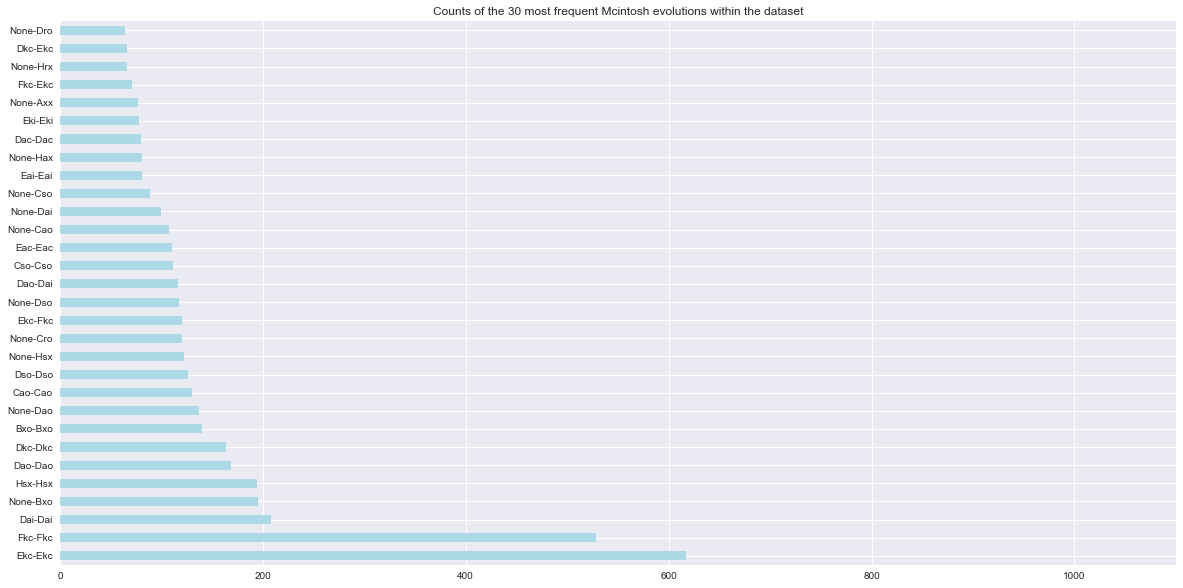

In [77]:
# Graphing Mcintosh classifications 
#clean_data['mcintosh'].value_counts().head(30).plot(kind='barh',figsize=(15,5), title = "Counts of the 30 most frequent Mcintosh classifications within the dataset")
# Graphing Mcintosh evolutions
clean_data['mcintosh_evolution'].value_counts().head(30).plot(kind='barh',color = "lightblue",xlim = (0,1100), figsize=(20,10), title = "Counts of the 30 most frequent Mcintosh evolutions within the dataset")
# Other independant features 
#for column in clean_data.columns: 
    #sns.displot(data=clean_data, x= column, color = "red")
plt.style.use('seaborn')

# Solar flare frequency 
#clean_data['goes_class_ind'].value_counts().plot(kind='bar', figsize=(10,10), title = "Solar flare frequency within dataset", color = "g")

<AxesSubplot:title={'center':'7 most frequent Mcintosh Evolutions within M/X class flares '}, ylabel='mcintosh_evolution'>

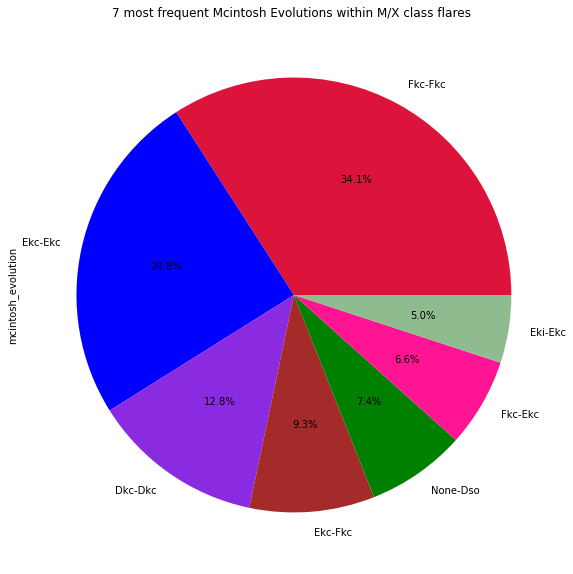

In [11]:
colours = ["Crimson", "Blue", "BlueViolet", "Brown", "Green", "DeepPink", "DarkSeaGreen" ]
clean_data.query("goes_class_ind == 'M' or goes_class_ind == 'X' ")['mcintosh_evolution'].value_counts().head(7).plot(kind='pie', autopct='%1.1f%%', colors = colours, figsize=(10,10), title = "7 most frequent Mcintosh Evolutions within M/X class flares ")

<AxesSubplot:title={'center':'7 most frequent Mcintosh Evolutions within B/C class flares '}, ylabel='mcintosh_evolution'>

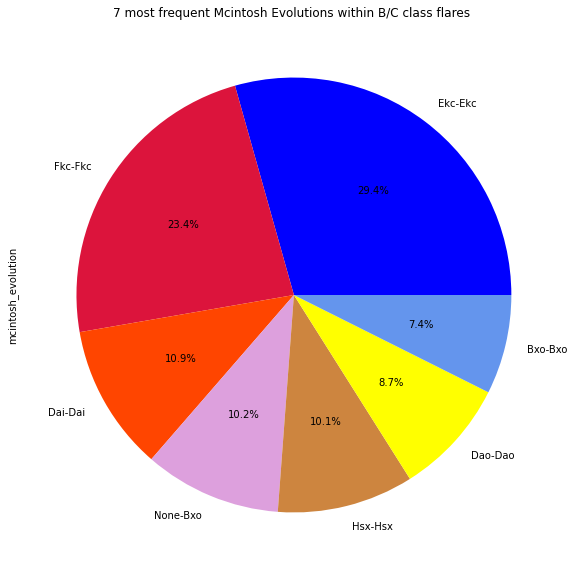

In [12]:
colours = [ "Blue", "Crimson" ,"OrangeRed", "Plum", "Peru", "Yellow", "CornflowerBlue" ]
clean_data.query("goes_class_ind == 'B' or goes_class_ind == 'C' ")['mcintosh_evolution'].value_counts().head(7).plot(kind='pie', figsize=(10,10),autopct='%1.1f%%', colors = colours, title = "7 most frequent Mcintosh Evolutions within B/C class flares ")

In [17]:
print(len(np.unique(clean_data["mcintosh_evolution"])))
len(data_2.columns[16:])

725


475

## NOAA dataset exporting

In [33]:
## Create Mcintosh evolution dataset 
data_2 = clean_data.drop(["mcintosh"], axis = 1)
data_2 = pd.concat([data_2, pd.get_dummies(data_2["greenwich"]), pd.get_dummies(data_2["mcintosh_evolution"])], axis = 1)
data_2 = data_2.drop(["mcintosh_evolution", "greenwich"], axis = 1)
# Get rid of hot encodes that are less than 1 in value (basically non existent)
#data_2.drop([col for col, val in data_2.sum().iteritems() if type(val) != str and val < 3], axis=1, inplace=True)

## Create normal dataset
data_1 = clean_data.drop(["mcintosh_evolution"], axis = 1)
data_1 = pd.concat([data_1, pd.get_dummies(data_1["greenwich"]), pd.get_dummies(data_1["mcintosh"])], axis = 1)
data_1 = data_1.drop(["mcintosh", "greenwich"], axis = 1)

In [34]:
## Create C excluded and B excluded flare datasets 
data_c = data_1[(data_1.goes_class_ind != "B") ].copy()
data_b = data_1[data_1.goes_class_ind != "C"].copy()
data_evolution = data_2[(data_2.goes_class_ind != "C") ].copy()
# Clean one more time before exporting 
for data in [data_1, data_c, data_b, data_evolution]: 
    data.goes_class_ind[data.goes_class_ind == "B"] = 0
    data.goes_class_ind[data.goes_class_ind == "C"] = 0
    data.goes_class_ind[data.goes_class_ind == "X"] = 1
    data.goes_class_ind[data.goes_class_ind == "M"] = 1
    data.set_index(data['matchtime'], inplace = True)
    data.drop(['level_0', 'index', 'noaa_ar_no', 'matchtime','goes_class'], axis = 1, inplace = True)

    

C:\Users\user\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\user\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\user\an

In [35]:
## Export data 
for data, name in zip([data_1, data_c, data_b, data_evolution], ["data_all","data_only_c", "data_only_b", "data_evolution"]):
    # Split training and testing into before 2015 and after 2015
    
    X = np.array(data.drop(["goes_class_ind"], axis = 1))
   
    # Make sure all numerical values are from -1 to 1 
    max_abs_scaler = preprocessing.MaxAbsScaler()
    X = max_abs_scaler.fit_transform(X)
    # Get feature index and y 
    feature_index = data.drop(["goes_class_ind"], axis = 1).columns 
    y = np.array(data.goes_class_ind).astype("int")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Exporting data out 
    export = X_train, X_test, y_train, y_test, feature_index 
    pickle_out = open("clean_data/" + name + ".pickle", "wb")
    pickle.dump(export, pickle_out)
    pickle_out.close()

## SHARP data 
importing data

In [3]:
raw_data = pd.read_csv("./Data import/SHARP_data_24.csv")
# for 48 hours:
#raw_data = pd.read_csv("./Data import/SHARP_data_48.csv")
raw_data = raw_data.drop(['index', 'Unnamed: 0', 'year', 'month', 'day', 'noaa_ar_no','central_meridian_dist', 'latitude', 'carrington_longitude','corr_whole_spot_area', 'mcintosh', 'LL', 'number_of_spots','greenwich', 'original_central_meridian_dist', 'original_latitude','matchtime','goes_class', 'integrated_flux','noaa_ar', 'event_starttime', 'event_peaktime', 'event_endtime'], axis = 1)



In [6]:
clean_data.columns

Index(['index', 'goes_class_ind', 'ERRVF', 'CMASK', 'USFLUX', 'MEANGAM',
       'ERRGAM', 'MEANGBT', 'ERRBT', 'MEANGBZ', 'ERRBZ', 'MEANGBH', 'ERRBH',
       'MEANJZD', 'ERRJZ', 'TOTUSJZ', 'ERRUSI', 'MEANALP', 'ERRALP', 'MEANJZH',
       'ERRMIH', 'TOTUSJH', 'ERRTUI', 'ABSNJZH', 'ERRTAI', 'SAVNCPP', 'ERRJHT',
       'MEANPOT', 'ERRMPOT', 'TOTPOT', 'ERRTPOT', 'MEANSHR', 'ERRMSHA',
       'SHRGT45', 'R_VALUE'],
      dtype='object')

In [4]:
# Get rid of missing data
clean_data = raw_data.dropna(axis = 0, subset=['goes_class_ind']).reset_index()
clean_data = clean_data.query("goes_class_ind != 'A'")
print(np.unique(clean_data.goes_class_ind, return_counts = True))
SHARP_data = clean_data.dropna(axis = 0, subset=['MEANJZH']).reset_index()
print(np.sum(clean_data.isna()))
print(np.sum(SHARP_data.isna()))
print()
print(np.unique(SHARP_data.goes_class_ind, return_counts = True))
#print("not a substantial difference in dataset after removing missing data:")
#print(np.unique(clean_data.goes_class_ind, return_counts = True))
#print(clean_data.shape)
#np.sum(clean_data.isna())


(array(['B', 'C', 'M', 'X'], dtype=object), array([3806, 6068,  634,   42], dtype=int64))
index                0
goes_class_ind       0
ERRVF             1085
CMASK             1085
USFLUX            1085
MEANGAM           1104
ERRGAM            1104
MEANGBT           1103
ERRBT             1103
MEANGBZ           1103
ERRBZ             1103
MEANGBH           1103
ERRBH             1103
MEANJZD           1103
ERRJZ             1103
TOTUSJZ           1085
ERRUSI            1085
MEANALP           1103
ERRALP            1103
MEANJZH           1103
ERRMIH            1103
TOTUSJH           1085
ERRTUI            1085
ABSNJZH           1085
ERRTAI            1085
SAVNCPP           1085
ERRJHT            1085
MEANPOT           1103
ERRMPOT           1103
TOTPOT            1085
ERRTPOT           1085
MEANSHR           1139
ERRMSHA           1103
SHRGT45           1103
R_VALUE           1085
dtype: int64
level_0            0
index              0
goes_class_ind     0
ERRVF              0
CMASK   

<AxesSubplot:title={'center':'Solar flare frequency within the SHARP dataset'}>

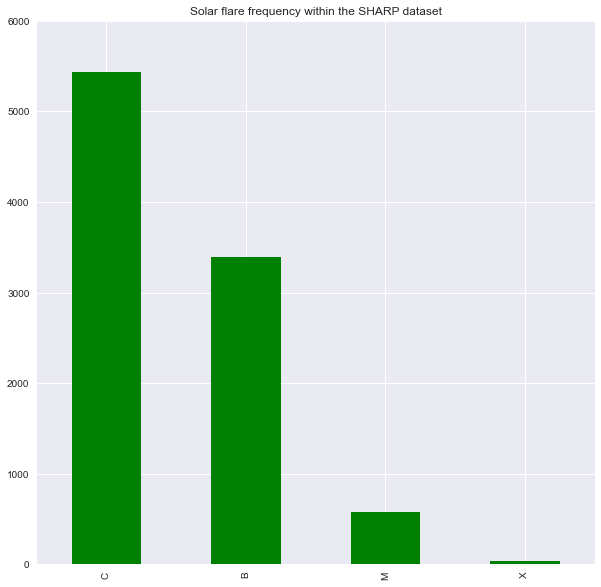

In [7]:
plt.style.use('seaborn')

#sns.displot(data=clean_data, x= "MEANSHR", color = "red")
      
# Solar flare frequency 
plt.ylim((0, 6000))
SHARP_data['goes_class_ind'].value_counts().plot(kind='bar', figsize=(10,10), title = "Solar flare frequency within the SHARP dataset", color = "g")

In [56]:
SHARP_data.columns

Index(['level_0', 'index', 'goes_class_ind', 'ERRVF', 'CMASK', 'USFLUX',
       'MEANGAM', 'ERRGAM', 'MEANGBT', 'ERRBT', 'MEANGBZ', 'ERRBZ', 'MEANGBH',
       'ERRBH', 'MEANJZD', 'ERRJZ', 'TOTUSJZ', 'ERRUSI', 'MEANALP', 'ERRALP',
       'MEANJZH', 'ERRMIH', 'TOTUSJH', 'ERRTUI', 'ABSNJZH', 'ERRTAI',
       'SAVNCPP', 'ERRJHT', 'MEANPOT', 'ERRMPOT', 'TOTPOT', 'ERRTPOT',
       'MEANSHR', 'ERRMSHA', 'SHRGT45', 'R_VALUE'],
      dtype='object')

In [61]:

values = {"MEANSHR": np.mean(clean_data["MEANSHR"]), "MEANGAM": np.mean(clean_data["MEANGAM"]), "ERRGAM":  np.mean(clean_data["ERRGAM"])}
SHARP_data = SHARP_data.fillna(values)
SHARP_data = SHARP_data.dropna(axis = 1)
SHARP_data = SHARP_data.replace([np.inf, -np.inf], np.nan)
SHARP_data = SHARP_data.drop(["index", "level_0" ], axis = 1)
SHARP_data = SHARP_data.dropna(axis = 0)#
#SHARP_data = SHARP_data[SHARP_data.goes_class_ind != "C"].copy()
SHARP_data.goes_class_ind[SHARP_data.goes_class_ind == "B"] = 0
SHARP_data.goes_class_ind[SHARP_data.goes_class_ind == "X"] = 1
SHARP_data.goes_class_ind[SHARP_data.goes_class_ind == "M"] = 1

C:\Users\user\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\user\anaconda3\envs\py3-TF2.0\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [25]:
for data, name in zip([SHARP_data], ["SHARP_data_24"]):
    # Split training and testing into before 2015 and after 2015
    
    X = np.array(data.drop(["goes_class_ind"], axis = 1))
   
    # Make sure all numerical values are from -1 to 1 
    max_abs_scaler = preprocessing.MaxAbsScaler()
    X = max_abs_scaler.fit_transform(X)
    # Get feature index and y 
    feature_index = data.drop(["goes_class_ind"], axis = 1).columns 
    y = np.array(data.goes_class_ind).astype("int")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Exporting data out 
    export = X_train, X_test, y_train, y_test, feature_index 
    pickle_out = open("clean_data/" + name + ".pickle", "wb")
    pickle.dump(export, pickle_out)
    pickle_out.close()

In [62]:
SHARP_data

,goes_class_ind,ERRVF,CMASK,USFLUX,MEANGAM,ERRGAM,MEANGBT,ERRBT,MEANGBZ,ERRBZ,...,SAVNCPP,ERRJHT,MEANPOT,ERRMPOT,TOTPOT,ERRTPOT,MEANSHR,ERRMSHA,SHRGT45,R_VALUE
0,0,1.649361e+18,2683.0,1.851209e+21,43.219,0.067,155.267,0.409,155.670,0.329,...,3.322235e+12,2.202908e+11,4537.476,19.162790,1.616767e+22,6.827976e+19,30.748,0.016,16.362,3.510
1,0,1.211683e+18,809.0,5.082311e+20,27.926,0.178,120.135,0.828,119.714,0.809,...,3.118513e+11,1.190365e+11,1712.692,19.054300,1.840096e+21,2.047171e+19,23.466,0.287,3.214,0.000
2,C,1.050143e+18,664.0,4.287361e+20,26.846,0.169,116.500,0.874,116.319,0.859,...,1.153920e+11,1.036230e+11,1788.641,20.219760,1.577262e+21,1.783023e+19,22.735,0.361,2.560,0.000
3,0,8.245620e+17,645.0,3.963334e+20,27.538,0.139,106.057,0.700,103.996,0.692,...,1.760098e+11,7.956555e+10,1644.526,16.083570,1.408682e+21,1.377700e+19,23.236,0.184,2.481,0.000
4,C,8.756110e+17,932.0,5.256552e+20,27.310,0.110,105.125,0.514,103.603,0.508,...,2.233142e+11,8.387223e+10,1456.952,11.446790,1.803324e+21,1.416813e+19,23.617,0.231,2.039,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8767,0,6.617472e+17,556.0,1.647684e+20,66.132,0.237,92.661,1.577,91.047,0.644,...,1.375425e+11,1.776860e+11,2625.360,54.939700,1.938547e+21,4.056708e+19,51.656,0.031,57.014,0.000
8768,0,9.697857e+17,966.0,4.976828e+20,55.638,0.140,131.062,0.951,127.864,0.535,...,2.536799e+11,2.212919e+11,3763.418,47.321270,4.828054e+21,6.070801e+19,37.070,0.011,30.228,2.595
8769,0,7.187704e+17,92.0,9.525501e+19,16.520,0.438,128.041,3.967,178.350,4.136,...,2.325784e+11,4.449592e+10,4995.128,125.751300,6.103052e+20,1.536430e+19,17.367,0.763,7.609,2.533
8770,0,3.397996e+18,8613.0,5.161003e+21,45.246,0.045,124.459,0.247,124.739,0.212,...,3.200914e+12,3.923535e+11,4475.562,11.647300,5.119347e+22,1.332270e+20,35.206,0.006,26.599,3.930
